## Select Device

In [1]:
import os
import torch

os.environ["CUDA_VISIBLE_DEVICES"] = "4,5,6,7"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Load Data

In [2]:
from torch.utils.data import Dataset, random_split
from tqdm import tqdm
from skimage import io

dataset_path = "./data/dataset.pt"
raw_data_dir = "./data/3_ultra_sound_data/Breast Ultrasound Images Dataset"

# Define the dataset class
class BreastDataset(Dataset):

    def __init__(self, data_dir):
        self.images = []
        self.labels = []
        self.masks = []

        self.load_images(os.path.join(data_dir, "normal"), 0)
        self.load_images(os.path.join(data_dir, "benign"), 1)
        self.load_images(os.path.join(data_dir, "malignant"), 2)

        # Save dataset
        torch.save(self, dataset_path)

    def load_images(self, dir_path, label):
        for filename in tqdm(os.listdir(dir_path)):
            if filename.endswith('.png') and 'mask' not in filename:
                
                img_path = os.path.join(dir_path, filename)
                img = io.imread(img_path)
                self.images.append(img)
                
                mask_path = os.path.splitext(img_path)[0] + "_mask.png"
                mask = io.imread(mask_path)                    
                self.masks.append(mask)

                self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx], self.masks[idx]
    

dataset = torch.load(dataset_path) if os.path.isfile(dataset_path) else BreastDataset(raw_data_dir)

# Define the sizes of the training, validation, and test sets
train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Use random_split to split the dataset
train_dataset, val_dataset, test_dataset = random_split(
    dataset, [train_size, val_size, test_size])

label_names = ['Normal', 'Benign', 'Malignant']

## Display Samples

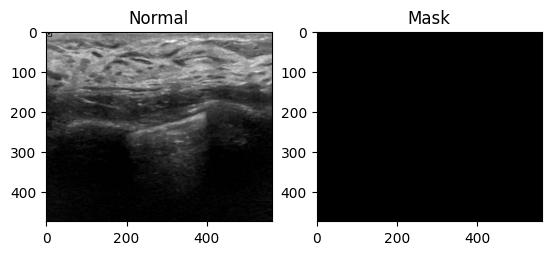

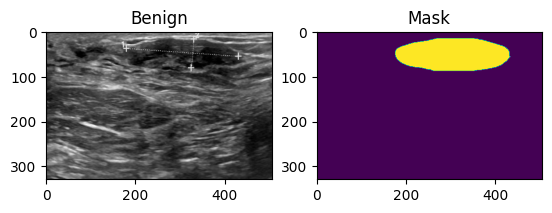

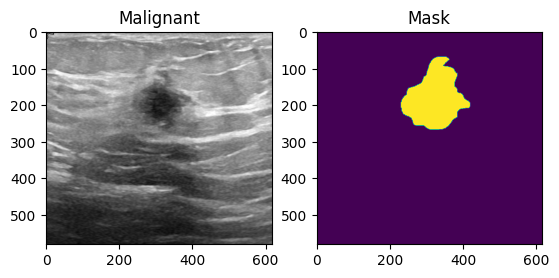

In [3]:
import matplotlib.pyplot as plt

def plot_sample(data, label):
    for i in range(len(data)):
        img, lbl, mask = data[i]
        if lbl == label:
            # Create a figure with two subplots
            _, axes = plt.subplots(ncols=2)

            # Display the image in the first subplot
            axes[0].imshow(img)
            axes[0].set_title(label_names[lbl])

            # Display the mask in the second subplot
            axes[1].imshow(mask)
            axes[1].set_title('Mask')

            # Show the figure
            plt.show()
            
            break

plot_sample(train_dataset, 0)
plot_sample(train_dataset, 1)
plot_sample(train_dataset, 2)